# Assignment #3


Deep Learning / Fall 1398, Iran University of Science and Technology



---



**Please pay attention to these notes:**

<br/>
- **Assignment Due: ** xxxx/xx/xx 23:59
- If you need any additional information, please review the assignment page on the course website.
- The items you need to answer are highlighted in red and the coding parts you need to implement are denoted by:
```
########################################
#     Put your implementation here     #
########################################
```
- We always recommend co-operation and discussion in groups for assignments. However, each student has to finish all the questions by himself/herself. If our matching system identifies any sort of copying, you'll be responsible for consequences. So, please mention his/her name if you have a team-mate.
- Students who audit this course should submit their assignments like other students to be qualified for attending the rest of the sessions.
- Finding any sort of copying will zero down that assignment grade and also will be counted as two negative assignment for your final score.
- When you are ready to submit, please follow the instructions at the end of this notebook.
- If you have any questions about this assignment, feel free to drop us a line. You may also post your questions on the course Forum page.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of its dependencies.
- **Before starting to work on the assignment Please fill your name in the next section *AND Remember to RUN the cell.* **

<br/>


Assignment Page: [https://iust-deep-learning.github.io/981/assignments/03_transfer_learning_and_sequence_to_sequence_models](https://iust-deep-learning.github.io/981/assignments/03_transfer_learning_and_sequence_to_sequence_models)

Course Forum: [https://groups.google.com/forum/#!forum/dl981/](https://groups.google.com/forum/#!forum/dl981/)


---



Fill your information here & run the cell

In [ ]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id =  95521378#@param {type:"integer"}
student_name = "Omid Ghahroodi" #@param {type:"string"}
Your_Github_account_Email = "oghahroodi98@gmail.com" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg03')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

your student id: 95521378
your name: Omid Ghahroodi


# Transfer learning warm up

Pre-trained networks are networks that are already trained and stored using a lot of data. We use these networks because:
- Our data is usually not very large.
- We do not need to start the training process from scratch.


Usually, first layers in deep networks extract general features, and as we move forward in the layers, the network learns patterns more specific to the task. So if we freeze the first layers and update the weights of the last layers according to your data, the network can better learn the patterns in our data for a particular task in less time and using relatively low data.

We now want to separate ambulance classes and ordinary cars using the VGG network. To do this, we use the data you generated for the previous assignment. You must generate those data in this assignment again and split the dataset into train and test.


In [ ]:
!pip install requests


from requests import exceptions
import argparse
import requests
import cv2
import os

def make_data_of_img(image,num_of_data,output_path):
  # set your Microsoft Cognitive Services API key along with (1) the
  # maximum number of results for a given search and (2) the group size
  # for results (maximum of 50 per request)
  API_KEY = "e9e0be277e5d42f285288ed546afad87"
  MAX_RESULTS = num_of_data
  GROUP_SIZE = 50
  
  # set the endpoint API URL
  URL = "https://api.cognitive.microsoft.com/bing/v5.0/images"



  # when attempting to download images from the web both the Python
  # programming language and the requests library have a number of
  # exceptions that can be thrown so let's build a list of them now
  # so we can filter on them
  EXCEPTIONS = set([IOError, FileNotFoundError,exceptions.RequestException, exceptions.HTTPError,exceptions.ConnectionError, exceptions.Timeout])
  # EXCEPTIONS = set()

  # store the search term in a convenience variable then set the
  # headers and search parameters
  term = image
  headers = {"Ocp-Apim-Subscription-Key" : API_KEY}
  params = {"q": term, "offset": 0, "count": GROUP_SIZE}

  # make the search
  print("[INFO] searching Bing API for '{}'".format(term))
  search = requests.get(URL, headers=headers, params=params)
  search.raise_for_status()

  # grab the results from the search, including the total number of
  # estimated results returned by the Bing API
  results = search.json()
  estNumResults = min(results["totalEstimatedMatches"], MAX_RESULTS)
  print("[INFO] {} total results for '{}'".format(estNumResults,term))

  # initialize the total number of images downloaded thus far
  total = 0


  # loop over the estimated number of results in `GROUP_SIZE` groups
  for offset in range(0, estNumResults, GROUP_SIZE):
      # update the search parameters using the current offset, then
      # make the request to fetch the results
      print("[INFO] making request for group {}-{} of {}...".format(offset, offset + GROUP_SIZE, estNumResults))
      params["offset"] = offset
      search = requests.get(URL, headers=headers, params=params)
      search.raise_for_status()
      results = search.json()
      print("[INFO] saving images for group {}-{} of {}...".format(offset, offset + GROUP_SIZE, estNumResults))

      # print(results)
      # loop over the results
      for v in results["value"]:
          # try to download the image
          try:
              # make a request to download the image
              print("[INFO] fetching: {}".format(v["contentUrl"]))
              r = requests.get(v["contentUrl"], timeout=30)

              # build the path to the output image
              ext = v["contentUrl"][v["contentUrl"].rfind("."):]
              p = os.path.sep.join([output_path, "{}{}".format(str(total).zfill(8), ext)])
              print(p)

              # write the image to disk
              f = open(p, "wb")
              f.write(r.content)
              f.close()

          # catch any errors that would not unable us to download the
          # image
          except Exception as e:
              # check to see if our exception is in our list of
              # exceptions to check for
              if type(e) in EXCEPTIONS:
                  print("[INFO] skipping: {}".format(v["contentUrl"]))
                  continue

          # try to load the image from disk
          image = cv2.imread(p)

          # if the image is `None` then we could not properly load the
          # image from disk (so it should be ignored)
          if image is None:
              print("[INFO] deleting: {}".format(p))
              os.remove(p)
              continue

          # update the counter
          total += 1



In [ ]:
!rm -rf dataset
!mkdir dataset
!mkdir dataset/normal_vehicles
!mkdir dataset/emergency_vehicles
!mkdir dataset/emergency_vehicles/ambulances

make_data_of_img(image='car',num_of_data=1000,output_path='dataset/normal_vehicles')
make_data_of_img(image='ambulances',num_of_data=1000,output_path='dataset/emergency_vehicles/ambulances')



[INFO] searching Bing API for 'car'


HTTPError: ignored

In [ ]:
!cp -r dataset drive/My\ Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!rm -rf data
!mkdir data
!mkdir data/train
!mkdir data/train/emergency_vehicles/
!mkdir data/train/normal_vehicles/

!mkdir data/validation
!mkdir data/validation/emergency_vehicles/
!mkdir data/validation/normal_vehicles/


In [ ]:
from shutil import copy
import os
import random

c=0
for i in os.listdir('drive/My Drive/dataset/normal_vehicles'):
    if (c==150):
        break
    f = os.path.join('drive/My Drive/dataset/normal_vehicles',i)
    if (f.split('.')[-1]=='jpg'):
        # print(f)
        c+=1
        if (random.randint(0,9)<=7):
            copy(f, '/content/data/train/normal_vehicles/')
        else:
            copy(f, '/content/data/validation/normal_vehicles/')


c=0
for i in os.listdir('drive/My Drive/dataset/emergency_vehicles/ambulances'):
    if (c==150):
        break
    f = os.path.join('drive/My Drive/dataset/emergency_vehicles/ambulances',i)
    if (f.split('.')[-1]=='jpg'):
        # print(f)
        c+=1
        if (random.randint(0,9)<=7):
            copy(f, '/content/data/train/emergency_vehicles/')
        else:
            copy(f, '/content/data/validation/emergency_vehicles/')




	
Now at first, we need to declare a VGG modal to extract the image features. You can see the structure and layers of the network below.
A pre-trained model can extract the features of an image itself. So at first, please do this classification task just with Features extracted from the VGG model.

In [ ]:
from keras.layers import Activation, Input, Dropout,Flatten
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K
from random import shuffle 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import matplotlib as plt



def recall(y_true, y_pred):
    """
    Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    """
    Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.

    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))



img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = len(os.listdir('data/train/emergency_vehicles'))+len(os.listdir('data/train/normal_vehicles'))
nb_validation_samples = len(os.listdir('data/validation/emergency_vehicles'))+len(os.listdir('data/validation/normal_vehicles'))
epochs = 10
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

save_dir = os.path.join(os.getcwd(), 'asg03')
model_name = 'HW2.{epoch:03d}.h5'

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]

Using TensorFlow backend.


In [ ]:
# from keras.applications import VGG16

# vgg16_model = VGG16(weights='imagenet', include_top=False)
# vgg16_model.summary()

# xs = {'train': [], 'test': []}
# for image in images['train']:
#   img = # first read image
#   img = cv2.resize(img, (224, 224))
#   img = np.expand_dims(img, axis=0)
#   img = preprocess_image(img)
#   features = vgg16_model.predict(img)
#   ff = features.flatten()
#   xs['train'].append(features)

# for image in images['test']:
#   img = # first read image
#   img = cv2.resize(img, (224, 224))
#   img = np.expand_dims(img, axis=0)
#   img = preprocess_image(img)
#   features = vgg16_model.predict(img)
#   ff = features.flatten()
#   xs['test'].append(features)

# ys = {'train': [], 'test': []}
# ys['train'] = labels['train'][:]
# ys['test'] = labels['test'][:]


from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense



img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = len(os.listdir('data/train/emergency_vehicles'))+len(os.listdir('data/train/normal_vehicles'))
nb_validation_samples = len(os.listdir('data/validation/emergency_vehicles'))+len(os.listdir('data/validation/normal_vehicles'))
epochs = 10
batch_size = 16


# build the VGG16 network
m = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in m.layers:
    layer.trainable = False
print('Model loaded.')
print(m.summary())
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(m)

model.add(top_model)


for layer in model.layers[:25]:
    layer.trainable = True


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=["accuracy",f1,recall,precision])
print(model.summary())


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    callbacks=callbacks,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)





58892288/58889256 [==============================] - 2s 0us/step






Model loaded.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________

Finally, implement a simple Keras model to the classification of these images.

In [ ]:
# from keras import models
# from keras import layers
# from keras import optimizers


Next, you need to do this task with fine-tuned model. How many layers of model do you think you need to update according to your data?

Now implement fine-tuning on the model and repeat classifying data with the same model as the previous part. 

In [ ]:
# from keras.applications import VGG16
# from keras import models
# from keras import layers
# from keras import optimizers

# vgg16_model = VGG16(weights='imagenet', include_top=False)
# vgg16_model.summary()

from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense



img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = len(os.listdir('data/train/emergency_vehicles'))+len(os.listdir('data/train/normal_vehicles'))
nb_validation_samples = len(os.listdir('data/validation/emergency_vehicles'))+len(os.listdir('data/validation/normal_vehicles'))
epochs = 10
batch_size = 16

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]


# build the VGG16 network
m = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
for layer in m.layers[5:-1]:
    layer.trainable = True
for layer in m.layers[:5]:
    layer.trainable = False

print('Model loaded.')
print(m.summary())
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(m)

model.add(top_model)




model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=["accuracy",f1,recall,precision])
print(model.summary())


train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    callbacks=callbacks,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Model loaded.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128

# 1. Multi objective Sequence to Sequence model

Remember the **Transfer Learning and Sequence to Sequence Model** practical class; you learned how to use a pre-trained model, and how to train a sequence to sequence model. In this task, you are going to build a sequence to sequence model by feeding English characters into your model and predicting French and Persian characters. There are some criteria that you must consider:
1. You have learned about building a character level sequence to sequence model in the [practical class](https://iust-deep-learning.github.io/981/practical/). You can review the full instruction and the code [here](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html) (We suggest practicing with [this](https://colab.research.google.com/drive/1LS0jeq6glTKoY7zRyQBvbBHmH-jKowZO) notebook before jumping to the answer). For your homework, you must implement a character-level multi-objective sequence to sequence model, which translates English texts to French and Persian Simultaneously. You can learn about building neural networks with multiple outputs [here](https://sanjayasubedi.com.np/deeplearning/multioutput-keras/).  

2. After training the model, you **must** use the prediction and test some samples, as it was provided in your practical class notebook.

3. You **must** use the dataset which was used in your practical class. For Persian translation, you must translate it from the English part by using any translation APIs such as [Google Translate](https://cloud.google.com/translate/docs/).

4. Remember saving all of your trained models under the path 'ASSIGNMENT_PATH /'.


In [ ]:
!wget http://www.manythings.org/anki/fra-eng.zip
!unzip fra-eng.zip

--2020-01-03 05:08:53--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.24.108.196, 104.24.109.196, 2606:4700:30::6818:6cc4, ...
Connecting to www.manythings.org (www.manythings.org)|104.24.108.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5800008 (5.5M) [application/zip]
Saving to: ‘fra-eng.zip’

fra-eng.zip         100%[===================>]   5.53M  6.44MB/s    in 0.9s    

2020-01-03 05:08:54 (6.44 MB/s) - ‘fra-eng.zip’ saved [5800008/5800008]

Archive:  fra-eng.zip
  inflating: _about.txt              
  inflating: fra.txt                 


In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np

batch_size = 64  # Batch size for training.
epochs = 10  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'fra.txt'

# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, _ = line.split('\t')
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
# print(input_texts)
# print(target_texts)
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.
    decoder_input_data[i, t + 1:, target_token_index[' ']] = 1.
    decoder_target_data[i, t:, target_token_index[' ']] = 1.

print(input_texts)
print(target_texts)

Number of samples: 10000
Number of unique input tokens: 70
Number of unique output tokens: 93
Max sequence length for inputs: 16
Max sequence length for outputs: 59
['Go.', 'Hi.', 'Hi.', 'Run!', 'Run!', 'Who?', 'Wow!', 'Fire!', 'Help!', 'Jump.', 'Stop!', 'Stop!', 'Stop!', 'Wait!', 'Wait!', 'Go on.', 'Go on.', 'Go on.', 'Hello!', 'Hello!', 'I see.', 'I try.', 'I won!', 'I won!', 'I won.', 'Oh no!', 'Attack!', 'Attack!', 'Cheers!', 'Cheers!', 'Cheers!', 'Cheers!', 'Get up.', 'Go now.', 'Go now.', 'Go now.', 'Got it!', 'Got it!', 'Got it?', 'Got it?', 'Got it?', 'Hop in.', 'Hop in.', 'Hug me.', 'Hug me.', 'I fell.', 'I fell.', 'I know.', 'I left.', 'I left.', 'I lost.', 'I paid.', "I'm 19.", "I'm OK.", "I'm OK.", 'Listen.', 'No way!', 'No way!', 'No way!', 'No way!', 'No way!', 'No way!', 'No way!', 'No way!', 'No way!', 'Really?', 'Really?', 'Really?', 'Thanks.', 'We try.', 'We won.', 'We won.', 'We won.', 'We won.', 'Ask Tom.', 'Awesome!', 'Be calm.', 'Be calm.', 'Be calm.', 'Be cool.',

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 70)     0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 93)     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 256), (None, 334848      input_1[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, None, 93)     0                                            
____________________________________________________________________________________________

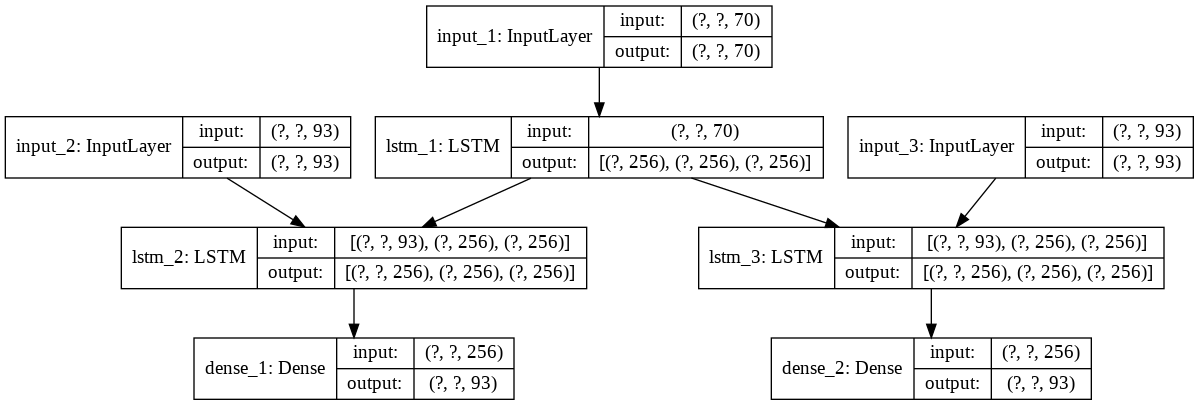

In [ ]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]


# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)



decoder_inputs2 = Input(shape=(None, num_decoder_tokens))
decoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs2, _, _ = decoder_lstm2(decoder_inputs2,
                                     initial_state=encoder_states)#eee
decoder_dense2 = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs2 = decoder_dense2(decoder_outputs2)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs, decoder_inputs2], [decoder_outputs,decoder_outputs2])
print(model.summary())
import tensorflow as tf
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)
# print(encoder_input_data)
# print(decoder_input_data)
# print(decoder_target_data)

# # Run training
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
#               metrics=['accuracy'])
# model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
#           batch_size=batch_size,
#           epochs=epochs,
#           validation_split=0.2)
# # Save model
# model.save('s2s.h5')

In [ ]:
# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence


for seq_index in range(100):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

# 2. BERT and Word Sense Disambiguation

In computational linguistics, word-sense disambiguation (WSD) is an open problem concerned with identifying which sense of a word is used in a sentence. Imagine a bank of water, or a bank which accepts deposits. You can distinguish these two "banks" easily because you understand the context of the sentence which is used for it. What if we want to distinguish senses of a word automatically? You have learned about word embeddings and W2V from the [first assignment](https://iust-deep-learning.github.io/981/assignments/01_mlp_and_preprocessing). W2V extracts a unique vector that is a representation of that word. That is sufficiant we are going distinguish between two different words, such as "Hi" and "Bye"; but we cannot purely depend on it when we want to distinguish between a specific word with several senses.

Researchers have developed several methods for tackling this issue. One of these techniques named DeConf is proposed by your professor, Dr. Pilehvar. He tackled this problem by de-conflating the representations of words based on the deep knowledge it derives from a semantic network. You can read the complete paper [here](https://arxiv.org/abs/1608.01961). Besides, A full survey about WSD is available [here](https://www.researchgate.net/publication/220566219_Word_Sense_Disambiguation_A_Survey).

In this task, we are going to distinguish between two senses of the word (noun) "bat" using [BERT](https://arxiv.org/abs/1810.04805). BERT is a context-aware language representation model that can produce different vectors for a specific word according to the context of the sentence.

According to [Cambridge dictionary](https://dictionary.cambridge.org/dictionary/english/bat), "bat" has two meanings:
1. A specially shaped piece of wood used for hitting the ball in some games (cricket bat)

2. A small animal like a mouse with wings that flies at night (mammal bat)



We use two simple datasets for our task. First, cricketbat.txt, which contains few sentences referring to bat used in cricket sport, and second, vampirebat.txt, which contains few sentences referring to the mammal bird bat. These datasets are available in [this](https://github.com/omkar-dsd/mini_projects/tree/master/word_sense_disambiuation) repository, which is used for another WSD approach using [Wordnet](https://wordnet.princeton.edu/). The full explanation of WSD using this method is available [here](https://towardsdatascience.com/a-simple-word-sense-disambiguation-application-3ca645c56357).

In [ ]:
# Download and load the datasets here. Then, separate and lower the sentences and insert them in a list.
!git clone https://github.com/omkar-dsd/mini_projects.git
cricketbat_file = open('mini_projects/word_sense_disambiuation/cricketbat.txt','r')
vampirebat_file = open('mini_projects/word_sense_disambiuation/vampirebat.txt','r')
cricketbat = cricketbat_file.read().lower()
vampirebat = vampirebat_file.read().lower()
cricketbat_list = cricketbat.split('.')
vampirebat_list = vampirebat.split('.')
print(cricketbat_list)
print(vampirebat_list)

Cloning into 'mini_projects'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (19/19), done.
['the blade of a cricket bat is a wooden block that is generally flat on the striking face and with a ridge on the reverse (back) which concentrates wood in the middle where the ball is generally hit', ' the bat is traditionally made from willow wood, specifically from a variety of white willow called cricket bat willow (salix alba var', ' caerulea), treated with raw (unboiled) linseed oil, which has a protective function', ' this variety of willow is used as it is very tough and shock-resistant, not being significantly dented nor splintering on the impact of a cricket ball at high speed, while also being light in weight', ' the face of the bat is often covered with a protective film by the user', ' the blade is connected to a long cylindrical cane handle, similar to that of a mid-20th-century tennis racquet, by mea

Now, we use BERT to encode words of these datasets. You can use [this](https://github.com/hanxiao/bert-as-service) repository to extract word embeddings of the sentences. Use BERT-Base, Uncased as your pre-trained BERT model. Then, insert the vectors of all words with root "bat" in another list for each dataset.

In [ ]:
# Use bert to extract the embeddings of "bat"s.
!pip install bert-serving-server
!pip install bert-serving-client

!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip /content/uncased_L-12_H-768_A-12.zip
!nohup bert-serving-start -model_dir /content/uncased_L-12_H-768_A-12 &
# !top

     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 1.1MB 23.9MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=f9ea128b5dd493ab0a3ba65f74b71be05b401d974910146f83d4f2c4424d9464
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: pyzmq 17.0.0
    Uninstalling pyzmq-17.0.0:
      Successfully uninstalled pyzmq-17.0.0


--2020-01-03 15:33:14--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M  98.9MB/s    in 3.9s    

2020-01-03 15:33:18 (98.9 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

Archive:  /content/uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  
nohup

In [ ]:
from bert_serving.client import BertClient
from numpy import linalg as LA


bc = BertClient()

try:
    cricketbat_list.remove(' ')
except:
    pass
try:
    vampirebat_list.remove(' ')
except:
    pass


cricketbat_encodes = bc.encode(cricketbat_list)
vampirebat_encodes = bc.encode(vampirebat_list)
print(cricketbat_encodes.shape)
print(vampirebat_encodes.shape)
# for i in range(0,len(cricketbat_list)):

#     tmp = cricketbat_list[i].split()
#     for j in range(0, len(tmp)):
#         if (tmp[j]=='bat' or tmp[j]=='bats'):
#             cricketbat_encode.append(cricketbat_encodes[i][j+1])

# print(cricketbat_encode)
# for i in range(cricketbat_encodes.shape[1]):
#     tmp = 0
#     for j in range(cricketbat_encodes.shape[0]):
#         tmp+=cricketbat_encodes[j][i]
#     cricketbat_avg.append(tmp/cricketbat_encodes.shape[0])

# for i in range(vampirebat_encodes.shape[1]):
#     tmp = 0
#     for j in range(vampirebat_encodes.shape[0]):
#         tmp+=vampirebat_encodes[j][i]
#     vampirebat_avg.append(tmp/vampirebat_encodes.shape[0])

import numpy as np
# cricketbat_avg = np.array(cricketbat_avg)
# vampirebat_avg = np.array(vampirebat_avg)

cricketbat_avg = LA.norm(cricketbat_encodes, axis=0)
vampirebat_avg = LA.norm(vampirebat_encodes, axis=0)
print(cricketbat_avg.shape)
print(vampirebat_avg.shape)

(22, 768)
(35, 768)
(768,)
(768,)


/usr/local/lib/python3.6/dist-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=25" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)


Now, you need to find a specific embedding for each sense of the "bat". A simple approach is averaging all "bat" vectors of each document. Then, you should calculate the distance between the BERT embedding of "bat" in our test cases with your document "bat"s. 

Hint: [This](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html) function may be useful.

In [ ]:
test_cases = ["bats are mammals","bats breed","bats are used to play cricket", "which bat has handle?","bats can fly"]
test_labels = ["mammal bat","mammal bat","cricket bat","cricket bat","mammal bat"]

your_labels = []

#fill your labels with the "bat" with minimum distance to the test case
test_encodes = bc.encode(test_cases)
print(test_encodes.shape)
for i in test_encodes:
    tmp1 = np.sum(np.abs(i-cricketbat_avg))
    tmp2 = np.sum(np.abs(i-vampirebat_avg))
    print(tmp1)
    print(tmp2)


assert test_labels==your_labels

(5, 768)
1241.2832
1598.6239
1239.0338
1596.3745
1241.4927
1598.8333
1242.4553
1599.7959
1239.5149
1596.8557


AssertionError: ignored

Hmm... It makes sense. Let's see what you produced. You should use [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) to compress the 768 dimensions of BERT embeddings into just 2 dimensions. Then, use matplotlib to visualize them.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD

# make a list of embeddings like this: [ALL_CRICKET_BAT_EMBEDDINGS,ALL_MAMMAL_BAT_EMBEDDINGS,AVERAGE_CRICKET_BAT_EMBEDDING,AVERAGE_MAMMAL_BAT_EMBEDDING,ALL_TEST_BAT_EMBEDDINS]
vec_all = []
pca = TruncatedSVD(n_components=2)
principalComponents = pca.fit_transform(vec_all)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data=principalComponents
                           , columns=['principal component 1', 'principal component 2'])



# make a colors list. use "b" for CRICKET_BATs, "r" for MAMMAL_BATs
colors =[]

#extract pc1 and pc2 for document bats
pc1_document=[]
pc2_document=[]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
for pc1, pc2, color in zip( pc1_document,pc2_document, colors):
    ax.scatter(pc1, pc2, s=50, color=color)
ax.legend()
ax.grid()
plt.show()

It seems that despite this considerable compression, the clusters are distinguishable. Now, for the last part, visualize the average vectors and the test case vectors.

In [ ]:
#extract pc1 and pc2 for average and test bats
pc1_remainings=[]
pc2_remainings=[]

colors =["b","r","m","m","c","c","m"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
for pc1, pc2, color in zip( pc1_remainings,pc2_remainings, colors):
    ax.scatter(pc1, pc2, s=50, color=color)
ax.legend()
ax.grid()
plt.show()

# Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instruction:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. Run **Create Submission** cell, It may take several minutes and it may ask you for your credential.
4. Run **Download Submission** cell to obtain your submission as a zip file.
5. Grab downloaded file (`dl_asg03__xx__xx.zip`) and submit it via [https://forms.gle/W8AMoNffho8TQLB87](https://forms.gle/W8AMoNffho8TQLB87).

**Note: ** We need your Github token to create (if doesn't exist previously) new repository to store learned model data. Also Google Drive token enables us to download the current notebook & create a submission. If you are interested feel free to check our code.

## Create Submission (Run the cell)

In [ ]:
#@title
! pip install -U --quiet PyDrive > /dev/null
! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 
  
import os
import time
import yaml
import json

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'assignment_03'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'dl_asg03__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

! tar xf hub-linux-amd64-2.10.0.tgz
! cd hub-linux-amd64-2.10.0/ && chmod a+x install && ./install
! hub config --global hub.protocol https
! hub config --global user.email "$Your_Github_account_Email"
! hub config --global user.name "$student_name"
! hub api --flat -X GET /user
! hub api -F affiliation=owner -X GET /user/repos > repos.json

repos = json.load(open('repos.json'))
repo_names = [r['name'] for r in repos]
has_repository = repo_name in repo_names
if not has_repository:
  get_ipython().system_raw('! hub api -X POST -F name=%s /user/repos > repo_info.json' % repo_name)
  repo_info = json.load(open('repo_info.json')) 
  repo_url = repo_info['clone_url']
else:
  for r in repos:
    if r['name'] == repo_name:
      repo_url = r['clone_url']
  
stream = open("/root/.config/hub", "r")
token = list(yaml.load_all(stream))[0]['github.com'][0]['oauth_token']
repo_url_with_token = 'https://'+token+"@" +repo_url.split('https://')[1]

! git clone "$repo_url_with_token"
! cp -r "$ASSIGNMENT_PATH" "$repo_name"/
! cd "$repo_name" && git add -A
! cd "$repo_name" && git commit -m "Add assignment 03 results"
! cd "$repo_name" && git push -u origin master

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'repo_url': repo_url,
    'asg_dir_contents': os.listdir(str(ASSIGNMENT_PATH)),
    'dateime': str(time.time()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

github.com username: oghahroodi98@gmail.com
github.com password for oghahroodi98@gmail.com (never stored): 
.login	oghahroodi
.id	44407313
.node_id	MDQ6VXNlcjQ0NDA3MzEz
.avatar_url	https://avatars2.githubusercontent.com/u/44407313?v=4
.gravatar_id	
.url	https://api.github.com/users/oghahroodi
.html_url	https://github.com/oghahroodi
.followers_url	https://api.github.com/users/oghahroodi/followers
.following_url	https://api.github.com/users/oghahroodi/following{/other_user}
.gists_url	https://api.github.com/users/oghahroodi/gists{/gist_id}
.starred_url	https://api.github.com/users/oghahroodi/starred{/owner}{/repo}
.subscriptions_url	https://api.github.com/users/oghahroodi/subscriptions
.organizations_url	https://api.github.com/users/oghahroodi/orgs
.repos_url	https://api.github.com/users/oghahroodi/repos
.events_url	https://api.github.com/users/oghahroodi/events{/privacy}
.received_events_url	https://api.github.com/users/oghahroodi/received_events
.type	User
.site_admin	false
.name	Omid 

## Download Submission (Run the cell)

In [ ]:
#@title
files.download(submission_file_name)

If that cell makes an error when running you can download file dl_asg03_your_struden_id_your_name.zip from left panel and files section by right-clicking on it and choosing download button.

# Special Thanks

Special thanks to Amirhossein Kazemnejad and Kiamehr Razaee for creating the template of deep learning course assignments.